##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
import pandas as pd 
import numpy as np
import sklearn 
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from patsy import dmatrices 
import matplotlib.pyplot as plt
scores_df=pd.read_csv('SCORES.csv')
print(scores_df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [2]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
scores_df.shape 

(25, 2)

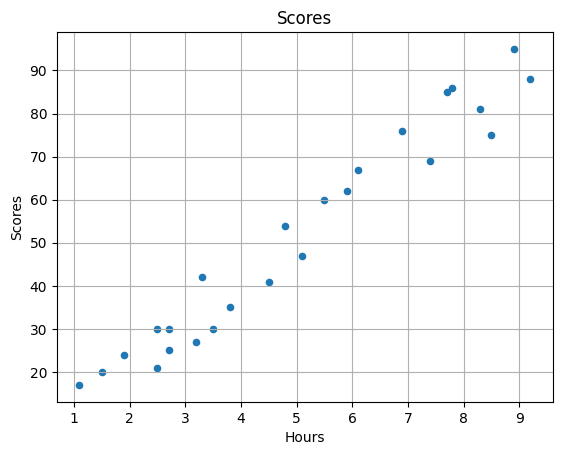

In [4]:
scores_df .plot.scatter(0,1)
plt.title('Scores')
plt.grid()
plt.show()

In [5]:
# rozdział na WE/WY
y = scores_df.Scores.values.reshape(-1,1)
X = scores_df.Hours.values.reshape(-1,1)


# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# wykonanie modelu regresji
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)


print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[9.71054094]]
Intercept: [2.79419668]


#### Atrybut coef_ z naszego modelu jest wektorem współczynników. W przypadku jednego predyktora odpowiada kątowi nachylenia prostej regresji.
#### Natomiast atrybut intercept_ odpowiada miejscu przecięcia z osią Y, gdy wszystkie predyktory są równe 0.
#### Te parapetry służą nam do określenia w jaką stronę zmierza nasza regresja w zależności od predyktorów.

In [7]:
compared_data = {'testowe' : y_test[:, 0],'przewidziane':y_pred[:, 0]}
compared_data_pd=pd.DataFrame(compared_data)
compared_data_pd

,testowe,przewidziane
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


#### Wyrysujemy sobie co zrobiliśmy dobrego  

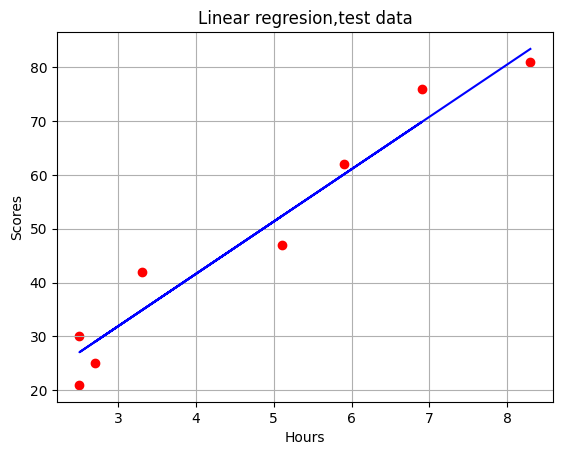

In [8]:
plt.scatter(X_test,y_test,color = "red")
plt.plot(X_test,y_pred,color = "blue")
plt.grid()
plt.title("Linear regresion,test data")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Walidacja uzyskanych wyników

In [9]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')

Średni błąd bezwzględny:
4.499999999999998 



In [10]:
print("Błąd średniokwadratowy: ")
print(sklearn.metrics.mean_squared_error(y_test,y_pred))

Błąd średniokwadratowy: 
23.61945761415174


In [11]:
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Pierwiastek błędu średniokwadratowego
4.859985351228103


# Dane z SBP.csv

    Age  SBP
0    60  117
1    61  120
2    74  145
3    57  129
4    63  132
5    68  130
6    66  127
7    77  163
8    63  136
9    54  115
10   63  118
11   76  132
12   60  111
13   61  112
14   65  147
15   79  138
16   69  141
17   56  124
18   62  122


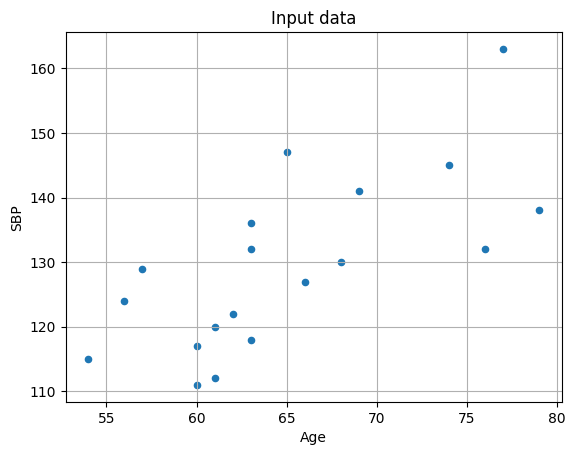

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


In [12]:
sbp_df=pd.read_csv('SBP.csv')
print(sbp_df)
sbp_df.plot.scatter(0, 1)
plt.title('Input data')
plt.grid()
plt.show()
sbp_df.describe()

In [13]:
sbp_df.shape

(19, 2)

In [14]:
y, X = sbp_df.SBP.values.reshape(-1,1), sbp_df.Age.values.reshape(-1,1)

# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)


Coefficient: [[1.44882707]]
Intercept: [36.17936475]


In [15]:
data = {'y_test': y_test[:, 0], 'y_pred': y_pred[:, 0]}
comparsion = pd.DataFrame(data)
comparsion

,y_test,y_pred
0,117,123.108989
1,130,134.699606
2,132,146.290222
3,120,124.557816
4,136,127.455470
5,141,136.148433


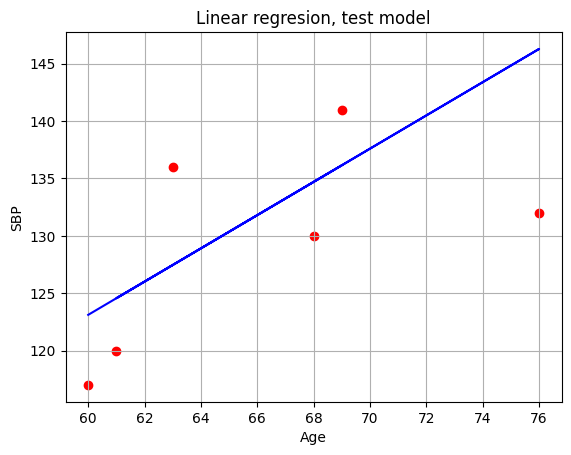

In [16]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue")
plt.grid()
plt.title('Linear regresion, test model')
plt.xlabel('Age')
plt.ylabel('SBP')
plt.show()

In [17]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')

Średni błąd bezwzględny:
7.175454985814123 



In [18]:
print("Błąd średniokwadratowy: ")
print(sklearn.metrics.mean_squared_error(y_test,y_pred))

Błąd średniokwadratowy: 
63.48947834957053


In [19]:
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Pierwiastek błędu średniokwadratowego
7.968028510840717


# Wnioski
Błędy już są dużo wieksze. Jest większy rozrzut danych. Jest mniejsza zalezność liniowa. 


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [20]:
petrol_df=pd.read_csv('PETROL.csv')
petrol_df.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
petrol_df.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [22]:
petrol_df.shape


(48, 5)

blicz korelację parami kolumn, z wyłączeniem wartości NA/null.

In [23]:
petrol_df.corr()['Zuzycie_paliwa']

Podatek_paliwowy                  -0.451280
Sredni_przychod                   -0.244862
Utwardzone_autostrady              0.019042
Procent_ludnosci_z_prawem_jazdy    0.698965
Zuzycie_paliwa                     1.000000
Name: Zuzycie_paliwa, dtype: float64

In [24]:
# rozdział na WE/WY
formula = 'Zuzycie_paliwa ~ Procent_ludnosci_z_prawem_jazdy + Utwardzone_autostrady + Sredni_przychod + Podatek_paliwowy'
y, X = dmatrices(formula, petrol_df)

# rozdział na dane treningowe/testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# wykonanie modelu regresji
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[ 0.00000000e+00  1.41331309e+03 -8.84110608e-03 -9.60242939e-02
  -5.54107224e+01]]
Intercept: [649.25725572]


In [25]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
77.48387023766801 

Błąd średniokwadratowy:
7466.997536221732 

Pierwiastek błędu średniokwadratowego
86.41179049309031


### Wnioski: Dane są zbyt rozstrzelone by uzyskać sensowną regresje liniową

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [26]:
heart_df = pd.read_csv('HEART.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [27]:
heart_df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [28]:
heart_df.corr(numeric_only=True)

,age,sex,cp,oldpeak,num
age,1.000000,0.013618,0.145826,0.177707,0.159315
sex,0.013618,1.000000,0.249875,0.118931,0.272781
cp,0.145826,0.249875,1.000000,0.353109,0.505864
oldpeak,0.177707,0.118931,0.353109,1.000000,0.545700
num,0.159315,0.272781,0.505864,0.545700,1.000000


In [29]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [30]:
# zmiania z '?' na NaN
for col in heart_df.columns:
    heart_df[col] = heart_df[col].replace('?', np.nan)

In [31]:
# Które kolumny usunąć?
heart_df.isna().sum() / heart_df.shape[0]

age           0.000000
sex           0.000000
cp            0.000000
trestbps      0.003401
chol          0.078231
fbs           0.027211
restecg       0.003401
thalach       0.003401
exang         0.003401
oldpeak       0.000000
slope         0.646259
ca            0.989796
thal          0.904762
num           0.000000
dtype: float64

In [32]:
# usuwam slope, ca i thal

heart_df = heart_df.drop(['slope', 'ca', 'thal'], axis=1)

In [33]:
# uzupełnianie pojedynczych wartości NaN
heart_df.fillna(method="ffill", inplace=True)

In [34]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [35]:
# metoda get_dummies()

dummies_cp = pd.get_dummies(heart_df.cp, prefix='cp', drop_first=True)
dummies_restecg = pd.get_dummies(heart_df.restecg, prefix='restecg', drop_first=True)
heart_df = heart_df.drop(['cp','restecg'],axis=1)

heart_df_dummies = pd.concat([heart_df, dummies_cp, dummies_restecg], axis=1)

heart_df_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'num       ', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2'],
      dtype='object')

In [36]:
heart_df_dummies = heart_df_dummies.rename(columns={'num       ': 'num'})

In [37]:
log_reg = linear_model.LogisticRegression()

In [38]:
X = heart_df_dummies.drop('num',axis=1)
y = heart_df_dummies['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [39]:
reg= LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)


/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [[-0.00252222  0.66949136 -0.00448961  0.00652759  0.80850862 -0.01871275
   0.90849275  1.08254396 -1.39202238 -0.25814596  0.62279172 -0.34247982
  -0.28078392]]
Intercept: [-0.32461718]


In [41]:
print('Średni błąd bezwzględny:')
print(sklearn.metrics.mean_absolute_error(y_test, y_pred), '\n')
print('Błąd średniokwadratowy:')
print(sklearn.metrics.mean_squared_error(y_test, y_pred), '\n')
print('Pierwiastek błędu średniokwadratowego')
print(sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny:
0.22033898305084745 

Błąd średniokwadratowy:
0.22033898305084745 

Pierwiastek błędu średniokwadratowego
0.46940279403817725
